# WeatherPy
----
Observed Trends:

* Temperatures appear to reach the highest near -20 to 20 degrees latitude.
* Temperatures are higher at latitudes closer to the equator. Temperatures are lower towards the earth's poles.
* Wind Speed, Cloudiness, and Humidity didn't show a relationship to Latitude.

In [119]:
# Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Use citipy to find the city from its latitude and longitude
from citipy import citipy

# API Key
from api_keys import weather_api_key

# Output File (CSV)
output_data_file = "output_data/city_weather.csv"

#Import CSV file and read 
city_weather = pd.read_csv("../output_data/cities.csv")
city_weather.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


## Generate Cities List

In [120]:
# List for holding lat_lngs and cities
lat_lng = []
cities = []

# Create a set of numpy random functions of lat and lng combos
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# Use zip to map the similar index of latitude and longitude into a single entity
lat_lng_together = zip(lats, lngs)

# Find the nearest city for each zip combo 
# Use Citypy to find nearest cities and there names
for lat_lng in lat_lng_together:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Add to cities list 
    if city not in cities:
        cities.append(city)

# Print the city count to check its random values are more than 500
print(len(cities))

600


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# URL                        
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Counter to sort through response
number = 0
group = 1

# Create DataFrame
city_weather_df = pd.DataFrame({"City": cities})

city_weather_df["Country"] = ""
city_weather_df["Date"] = ""      
city_weather_df["Latitude"] = ""
city_weather_df["Longitude"] = ""
city_weather_df["Cloudiness (%)"] = ""
city_weather_df["Humidity (%)"] = ""
city_weather_df["Max Temp (F)"] = ""
city_weather_df["Wind Speed (mph)"] = ""


# API call through Cities and compile data
# Checked that weather response was correct in API documentation by printing query_url and putting into browser with Denver at end
for index, row in city_weather_df.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {number}  of Group {group} | {city}.")
        
        #print (query_url) 
        city_weather_df.loc[index, "Country"] = weather_response["sys"]["country"]    
        city_weather_df.loc[index, "Date"] = weather_response["dt"]
        city_weather_df.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        city_weather_df.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        city_weather_df.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        city_weather_df.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
        city_weather_df.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        city_weather_df.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
               
    except:
        print(f"City weather isn't available...skipping {city}.")
         
    # To save money on API calls
    number = number + 1
    if number == 50:
        number= 0
        group = group + 1 


Processing Record 0  of Group 1 | taolanaro.
City weather isn't available...skipping taolanaro.
Processing Record 1  of Group 1 | mvuma.
Processing Record 2  of Group 1 | awjilah.
Processing Record 3  of Group 1 | punta arenas.
Processing Record 4  of Group 1 | vallenar.
Processing Record 5  of Group 1 | salto.
Processing Record 6  of Group 1 | port elizabeth.
Processing Record 7  of Group 1 | rikitea.
Processing Record 8  of Group 1 | rio gallegos.
Processing Record 9  of Group 1 | kasongo.
Processing Record 10  of Group 1 | jamestown.
Processing Record 11  of Group 1 | port alfred.
Processing Record 12  of Group 1 | gat.
Processing Record 13  of Group 1 | karpogory.
Processing Record 14  of Group 1 | arraial do cabo.
Processing Record 15  of Group 1 | hermanus.
Processing Record 16  of Group 1 | sarangani.
Processing Record 17  of Group 1 | kamenka.
Processing Record 18  of Group 1 | pedernales.
Processing Record 19  of Group 1 | avarua.
Processing Record 20  of Group 1 | saint-phili

Processing Record 24  of Group 4 | kielce.
Processing Record 25  of Group 4 | parana.
Processing Record 26  of Group 4 | koslan.
Processing Record 27  of Group 4 | jinxiang.
Processing Record 28  of Group 4 | plettenberg bay.
Processing Record 29  of Group 4 | pucallpa.
Processing Record 30  of Group 4 | aykhal.
Processing Record 31  of Group 4 | bereda.
Processing Record 32  of Group 4 | abdanan.
Processing Record 33  of Group 4 | kabanjahe.
Processing Record 34  of Group 4 | belushya guba.
City weather isn't available...skipping belushya guba.
Processing Record 35  of Group 4 | severo-kurilsk.
Processing Record 36  of Group 4 | ocampo.
Processing Record 37  of Group 4 | roseau.
Processing Record 38  of Group 4 | paraiso.
Processing Record 39  of Group 4 | san quintin.
Processing Record 40  of Group 4 | halalo.
City weather isn't available...skipping halalo.
Processing Record 41  of Group 4 | dingle.
Processing Record 42  of Group 4 | muros.
Processing Record 43  of Group 4 | maputo.


Processing Record 37  of Group 7 | ponta do sol.
Processing Record 38  of Group 7 | esperance.
Processing Record 39  of Group 7 | ust-nera.
Processing Record 40  of Group 7 | vila velha.
Processing Record 41  of Group 7 | ayan.
Processing Record 42  of Group 7 | virginia beach.
Processing Record 43  of Group 7 | karatau.
Processing Record 44  of Group 7 | champerico.
Processing Record 45  of Group 7 | benguela.
Processing Record 46  of Group 7 | realeza.
Processing Record 47  of Group 7 | kununurra.
Processing Record 48  of Group 7 | codrington.
Processing Record 49  of Group 7 | saint anthony.
Processing Record 0  of Group 8 | wajima.
Processing Record 1  of Group 8 | brae.
Processing Record 2  of Group 8 | tilichiki.
Processing Record 3  of Group 8 | palana.
Processing Record 4  of Group 8 | khromtau.
Processing Record 5  of Group 8 | tsaratanana.
Processing Record 6  of Group 8 | diu.
Processing Record 7  of Group 8 | amapa.
Processing Record 8  of Group 8 | almaznyy.
Processing Rec

Processing Record 9  of Group 11 | ishigaki.
Processing Record 10  of Group 11 | viligili.
City weather isn't available...skipping viligili.
Processing Record 11  of Group 11 | sao joao da barra.
Processing Record 12  of Group 11 | libertador general san martin.
Processing Record 13  of Group 11 | tiarei.
Processing Record 14  of Group 11 | sur.
Processing Record 15  of Group 11 | dali.
Processing Record 16  of Group 11 | maloshuyka.
City weather isn't available...skipping maloshuyka.
Processing Record 17  of Group 11 | khonuu.
City weather isn't available...skipping khonuu.
Processing Record 18  of Group 11 | tokzar.
City weather isn't available...skipping tokzar.
Processing Record 19  of Group 11 | vuktyl.
Processing Record 20  of Group 11 | dunedin.
Processing Record 21  of Group 11 | opovo.
Processing Record 22  of Group 11 | half moon bay.
Processing Record 23  of Group 11 | raga.
Processing Record 24  of Group 11 | khandbari.
Processing Record 25  of Group 11 | garowe.
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [123]:
# Check that the API call returned more than 500, for homework requirement
print(len(city_weather_df))

605


In [124]:
# Check that every column has the same amount of data in it!
city_weather_df.count()

City                605
Country             605
Date                605
Latitude            605
Longitude           605
Cloudiness (%)      605
Humidity (%)        605
Max Temp (F)        605
Wind Speed (mph)    605
dtype: int64

In [125]:
# Make data frame from strings to float so the graphs with function
pd.to_numeric(city_weather_df["Cloudiness (%)"]).astype(float)
pd.to_numeric(city_weather_df["Humidity (%)"]).astype(float)
pd.to_numeric(city_weather_df["Latitude"]).astype(float)
pd.to_numeric(city_weather_df["Longitude"]).astype(float)
pd.to_numeric(city_weather_df["Max Temp (F)"]).astype(float)
pd.to_numeric(city_weather_df["Wind Speed (mph)"]).astype(float)

city_weather= pd.DataFrame(city_weather_df)
city_weather.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,taolanaro,,,,,,,,
1,mvuma,ZW,1618537134,-19.2792,30.5283,65,73,52.25,2.92
2,awjilah,LY,1618537134,29.1081,21.2869,1,34,67.388,3.25
3,punta arenas,CL,1618536943,-53.15,-70.9167,90,71,50.27,10.29
4,vallenar,CL,1618537134,-28.5708,-70.7581,99,70,65.534,1.03


In [126]:
city_weather.to_csv("../output_data/WeatherData.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
# sorry but I didn't do this part -MS

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The max temperatures are highest near the equator.


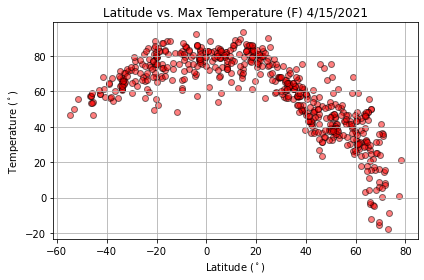

In [128]:
# Create Scatter Plots
# ($^\circ$) is for degrees symbol
# TypeError: 'value' must be an instance of str or bytes, not a float, so I converted the data below
plt.scatter(pd.to_numeric(city_weather["Latitude"]).astype(float), pd.to_numeric(city_weather["Max Temp (F)"]).astype(float),  alpha=.5, facecolor="red", edgecolors="black", marker ="o")
plt.title(f"Latitude vs. Max Temperature (F) 4/15/2021")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Temperature ($^\circ$)")
plt.grid(True) 
plt.tight_layout()
print(f"The max temperatures are highest near the equator.")
# Save figure to Images folder
plt.savefig("../Images/Latitude vs Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

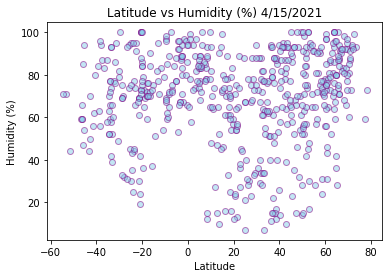

In [129]:
plt.scatter(pd.to_numeric(city_weather["Latitude"]).astype(float), pd.to_numeric(city_weather["Humidity (%)"]).astype(float), facecolors="skyblue", edgecolors="purple", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Latitude vs Humidity (%) 4/15/2021")

plt.savefig("../Images/Latitude vs Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

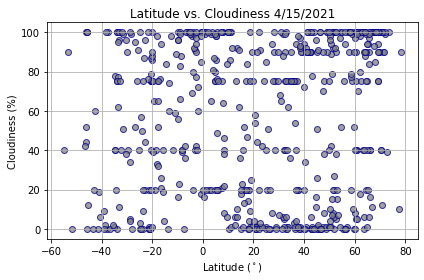

In [130]:
plt.scatter(pd.to_numeric(city_weather["Latitude"]).astype(float), pd.to_numeric(city_weather["Cloudiness (%)"]).astype(float), alpha=.75, facecolors= "grey", edgecolors="darkblue")

plt.title(f"Latitude vs. Cloudiness 4/15/2021")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Cloudiness (%)")
plt.grid(True) 
plt.tight_layout()

plt.savefig("../Images/latitude vs cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

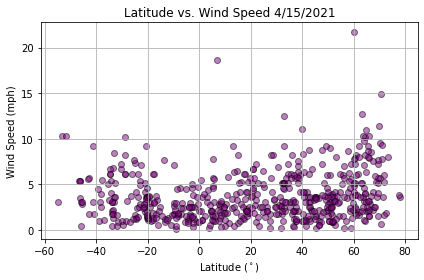

In [131]:
plt.scatter(pd.to_numeric(city_weather["Latitude"]).astype(float), pd.to_numeric(city_weather["Wind Speed (mph)"]).astype(float), alpha=.5, facecolors= "purple", edgecolors="k")
plt.title(f"Latitude vs. Wind Speed 4/15/2021")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Wind Speed (mph)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("../Images/latitude vs wind speed.png")
plt.show()

## Linear Regression

In [143]:
# Create Northern and Southern Hemisphere DataFrames
north = city_weather.loc[pd.to_numeric(city_weather["Latitude"]).astype(float) > 0, :]
south = city_weather.loc[pd.to_numeric(city_weather["Latitude"]).astype(float) < 0, :]

#print(north)
#print (south)

# Make a function for creating linear regression
def linear_regression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.96x + 91.44
The r-squared is : -0.8641376071285864, which shows a strong correlation
The regression displays a strong, negative correlation, so the more north you go the colder it gets


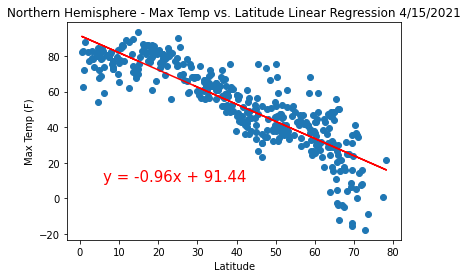

In [148]:
# Must convert the values to float to graph 
x_values = pd.to_numeric(north['Latitude']).astype(float)
y_values = pd.to_numeric(north['Max Temp (F)']).astype(float)

# Linear Regression equation not working, so use manual input
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is : {rvalue}, which shows a strong correlation")
print("The regression displays a strong, negative correlation, so the more north you go the colder it gets")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression 4/15/2021")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.savefig("../Images/Northern - Max Temp vs. Latitude LR.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.5x + 82.32
The r-squared is : 0.6644842291583075, which shows a strong correlation
The regression displays a strong, positive correlation, so the more towards the equator you go the hotter it gets


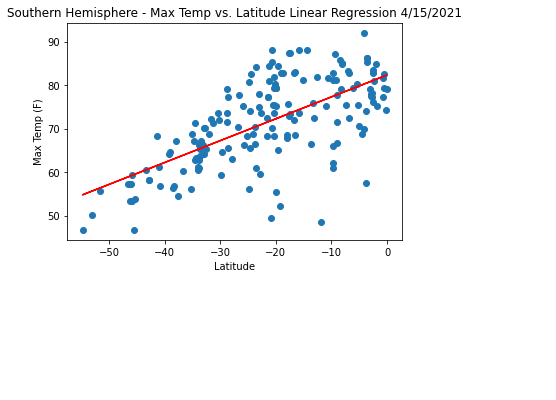

In [145]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp (F)']).astype(float)

# Linear Regression equation not working, so use manual input
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is : {rvalue}, which shows a strong correlation")
print("The regression displays a strong, positive correlation, so the more towards the equator you go the hotter it gets")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression 4/15/2021')

plt.savefig("../Images/Southern - Max Temp vs. Latitude LR.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.19x + 61.05
The r-squared is : 0.16337238911608368, which shows a weak correlation
The regression displays a little correlation, so the more north you go doesn't effect humidity


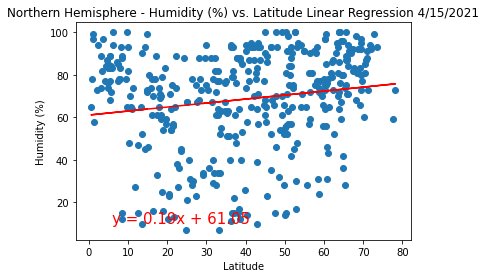

In [135]:
x_values = pd.to_numeric(north['Latitude']).astype(float)
y_values = pd.to_numeric(north['Humidity (%)']).astype(float)

# Linear Regression equation not working, so use manual input
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is : {rvalue}, which shows a weak correlation")
print("The regression displays a little correlation, so the more north you go doesn't effect humidity")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression 4/15/2021')

plt.savefig("../Images/Northern - Humidity (%) vs. Latitude LR.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.39x + 80.1
The r-squared is : 0.2809228197712824, which shows a weak correlation
The regression displays a little correlation, so the more toward the equator you go doesn't effect humidity


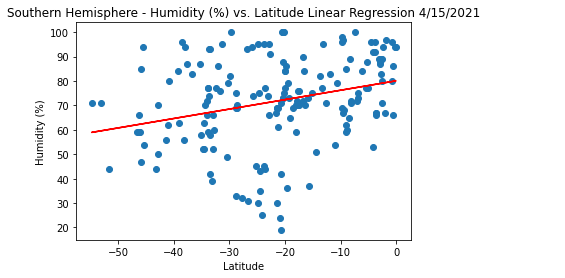

In [136]:
x_values = pd.to_numeric(south['Latitude']).astype(float)
y_values = pd.to_numeric(south['Humidity (%)']).astype(float)

# Linear Regression equation not working, so use manual input
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is : {rvalue}, which shows a weak correlation")
print("The regression displays a little correlation, so the more toward the equator you go doesn't effect humidity")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression 4/15/2021')

plt.savefig("../Images/Southern - Humidity (%) vs. Latitude LR.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.33x + 41.32
The r-squared is : 0.16695477641101572, which shows a weak correlation
The regression displays a little correlation, so the more north you go doesn't effect cloudiness


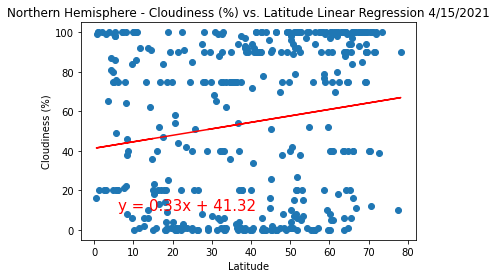

In [137]:
x_values = pd.to_numeric(north['Latitude']).astype(float)
y_values = pd.to_numeric(north['Cloudiness (%)']).astype(float)

# Linear Regression equation not working, so use manual input
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is : {rvalue}, which shows a weak correlation")
print("The regression displays a little correlation, so the more north you go doesn't effect cloudiness")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression 4/15/2021')

plt.savefig("../Images/Northern - Cloudiness (%) vs. Latitude LR.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.67x + 71.0
The r-squared is : 0.24236594744616646, which shows a weak correlation
The regression displays a little correlation, so the more towards the equator you go doesn't effect cloudiness


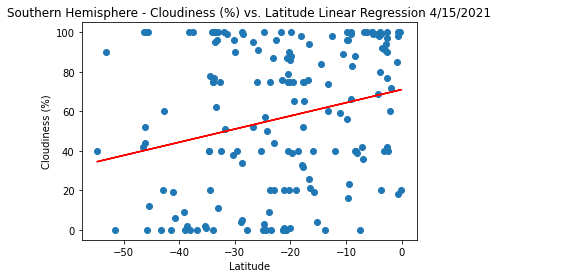

In [138]:
x_values = pd.to_numeric(south['Latitude']).astype(float)
y_values = pd.to_numeric(south['Cloudiness (%)']).astype(float)

# Linear Regression equation not working, so use manual input
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is : {rvalue}, which shows a weak correlation")
print("The regression displays a little correlation, so the more towards the equator you go doesn't effect cloudiness")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression 4/15/2021')

plt.savefig("../Images/Southern - Cloudiness (%) vs. Latitude LR.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.03x + 2.65
The r-squared is : 0.2300164812539141, which shows a weak correlation
The regression displays a little correlation, so the more towards the equator you go doesn't effect cloudiness


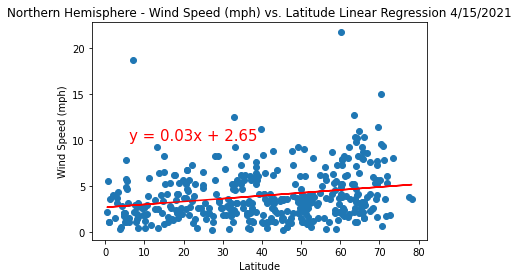

In [139]:
x_values = pd.to_numeric(north['Latitude']).astype(float)
y_values = pd.to_numeric(north['Wind Speed (mph)']).astype(float)

# Linear Regression equation not working, so use manual input
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is : {rvalue}, which shows a weak correlation")
print("The regression displays a little correlation, so the more towards the equator you go doesn't effect cloudiness")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression 4/15/2021')

plt.savefig("../Images/Northern - Wind Speed (mph) vs. Latitude LR.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.06x + 1.94
The r-squared is : -0.3529215689634997, which shows a weak correlation
The regression displays a little correlation, so the more towards the equator you go doesn't effect cloudiness


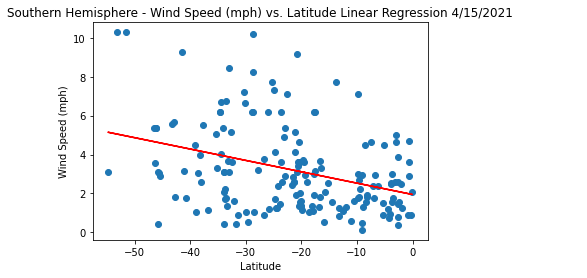

In [140]:
x_values = pd.to_numeric(south['Latitude']).astype(float)
y_values = pd.to_numeric(south['Wind Speed (mph)']).astype(float)

# Linear Regression equation not working, so use manual input
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is : {rvalue}, which shows a weak correlation")
print("The regression displays a little correlation, so the more towards the equator you go doesn't effect cloudiness")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression 4/15/2021')

plt.savefig("../Images/Southern - Wind Speed (mph) vs. Latitude LR.png")